# Linear regression

Import all the modules you will need in this notebook here:

In [56]:
# exercise 0
# Put your solution here!
import pandas as pd
import statsmodels
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [57]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
path = get_path("fram.txt")
fram = pd.read_csv(path, sep='\t')
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [58]:
# exercise 2
# Put your solution here!
def rescale(series: pd.Series) -> pd.Series:
    """
    Center the data in `series` (subtract the mean) and
    normalize by dividing by 2 * standard deviation.
    """
    mu = series.mean()
    sigma = series.std()
    return (series - mu) / (2 * sigma)

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [59]:
# exercise 3
# Put your solution here!

num_cols = fram.select_dtypes(include=['number']).columns.tolist()
cont_cols = [c for c in num_cols if c != 'ID']
for col in cont_cols:
    fram['s' + col] = rescale(fram[col])


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [60]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [62]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()

In [63]:

fit1 = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
r2_no_age = fit1.rsquared
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
r2_with_age = fit.rsquared
increase = r2_with_age - r2_no_age
print(f"R²:  {r2_no_age:.4f}")
print(f"R² with age:  {r2_with_age:.4f}")
print(f"Diference R²:   {increase:.4f}")
imp = fit.params.abs().sort_values(ascending=False)
print(imp)


R²:  0.1253
R² with age:  0.1461
Diference R²:   0.0208
Intercept      150.169477
sFRW            16.977115
sAGE             8.133171
SEX[T.male]      4.380468
sCHOL            4.269637
dtype: float64


How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

The R^2 model without age is 0.1253, with age is 0.1461, including age increases the explanatory power by 0.0208 or 2.08 porcentage points.

The variables most important are:
weight with 16.98
age with 8.13
sex with 4.38
cholesterol with 4.27

Weight (sFRW) is the strongest continuous predictor of systolic blood pressure once all variables are centered and scaled.
Cholesterol (sCHOL) contributes the least of the four, although it remains statistically significant.

***

Try to add to the model all the interactions with other variables. 

In [64]:
# exercise 6
# Put your solution here!
fit = smf.ols(
    'SBP ~ (sFRW + SEX + sCHOL + sAGE)**2',
    data=fram
).fit()


Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

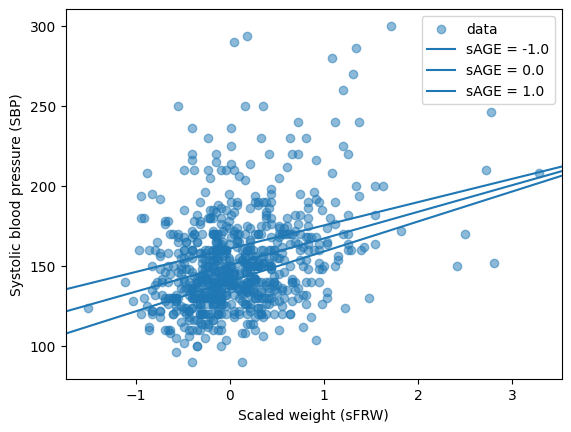

In [65]:
# exercise 7
# Put your solution here!
df_f = fram[fram['SEX'] == 'female']
x = np.linspace(df_f['sFRW'].min(), df_f['sFRW'].max(), 100)
b0    = fit.params['Intercept']
b_frw = fit.params['sFRW']
b_age = fit.params['sAGE']
b_int = fit.params['sFRW:sAGE']
plt.figure()
plt.scatter(df_f['sFRW'], df_f['SBP'], alpha=0.5, label='data')
for age_val in [-1.0, 0.0, 1.0]:
    intercept = b0 + b_age * age_val
    slope     = b_frw + b_int * age_val
    abline_plot(
        intercept=intercept,
        slope=slope,
        label=f'sAGE = {age_val}',
        ax=plt.gca()
    )
plt.xlabel('Scaled weight (sFRW)')
plt.ylabel('Systolic blood pressure (SBP)')
plt.legend()
plt.show()


How does the dependence of blood pressure on weight change as a person gets older?
***

The weight–age interaction coefficient is positive, which tells us that the effect of weight on systolic blood pressure grows stronger as a person gets older.
In other words, each additional (scaled and centered) unit of weight raises systolic blood pressure more in older subjects than in younger ones.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

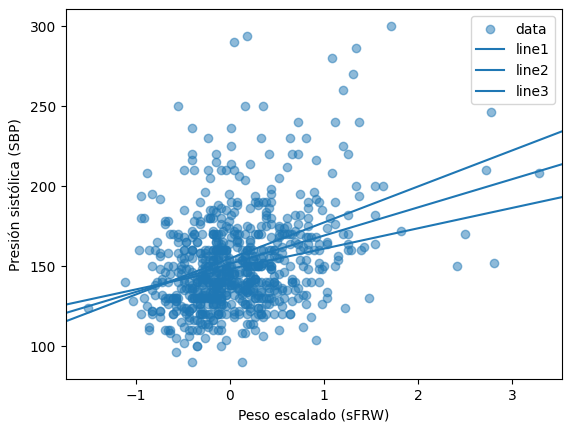

In [66]:
# exercise 8

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
fit = smf.ols(
    'SBP ~ (sFRW + SEX + sCHOL + sAGE + sCIG)**2',
    data=fram
).fit()
df_f = fram[fram['SEX'] == 'female']
x = np.linspace(df_f['sFRW'].min(), df_f['sFRW'].max(), 100)
b = fit.params
b0         = b['Intercept']
b_frw      = b['sFRW']
b_frw_chol = b['sFRW:sCHOL']
plt.figure()
plt.scatter(df_f['sFRW'], df_f['SBP'], alpha=0.5, label='data')
for chol_val in [-1.0, 0.0, 1.0]:
    intercept = b0 + b['sCHOL'] * chol_val
    slope     = b_frw + b_frw_chol * chol_val
    abline_plot(intercept=intercept,
                slope=slope,
                ax=plt.gca())
plt.xlabel('Peso escalado (sFRW)')
plt.ylabel('Presión sistólica (SBP)')
plt.legend(['data', 'line1', 'line2', 'line3'])
plt.show()


How does the model and its accuracy look?

***

The fully specified model with all two-way interactions (including cigarettes, age, weight, cholesterol and sex) shows a substantial jump in explanatory power compared to the simpler models, The R^2 climbs from about 0.146 (without cigarettes and interactions) to roughly 0.18–0.20 once you add cigarettes and all pairwise terms.

***

# Logistic regression

In [13]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [67]:
# exercise 9
# Put your solution here!
fram['HIGH_BP'] = (
    (fram['SBP'] >= 140) |
    (fram['DBP'] >= 90)
).astype(int)
fit = smf.logit(
    'HIGH_BP ~ sFRW + SEX + SEX:sFRW',
    data=fram
).fit(disp=False)
probs = fit.predict(fram)
preds = (probs >= 0.5).astype(int)
error_rate_orig = np.mean(preds != fram['HIGH_BP'])
print(f"Error rate (original model): {error_rate_orig:.4f}")

Error rate (original model): 0.3558


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [68]:
# exercise 10
# Put your solution here!
fit = smf.logit(
    'HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX',
    data=fram
).fit(disp=False)
probs     = fit.predict(fram)
preds     = (probs >= 0.5).astype(int)
error_rate = np.mean(preds != fram['HIGH_BP'])
print(f"Original error rate: {error_rate_orig:.4f}")
print(f"New error rate with age: {error_rate:.4f}")

Original error rate: 0.3558
New error rate with age: 0.3278


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

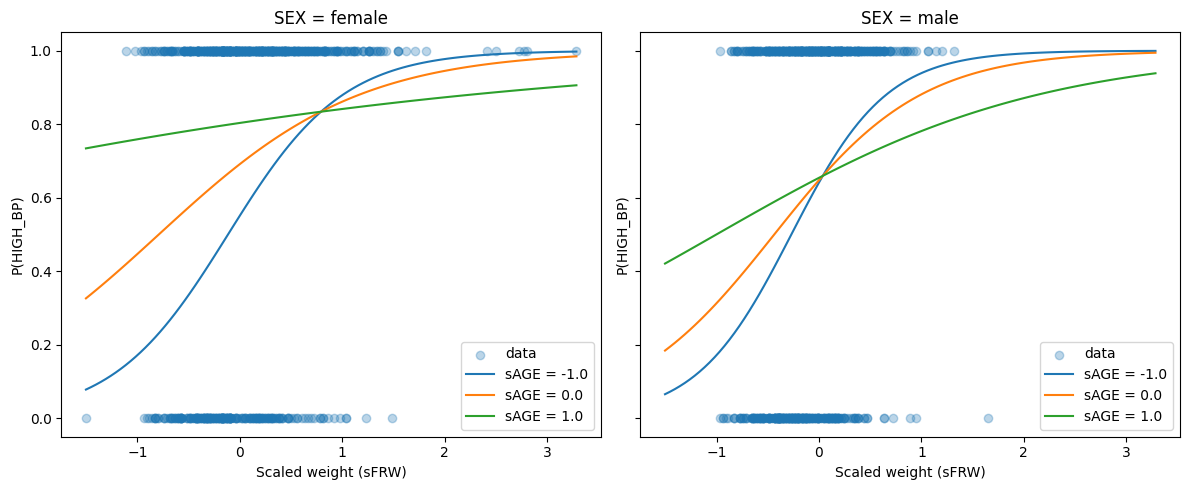

In [69]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
age_levels = [-1.0, 0.0, 1.0]
sexes = ['female', 'male']
x = np.linspace(fram['sFRW'].min(), fram['sFRW'].max(), 100)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, sex in zip(axes, sexes):
    df_sex = fram[fram['SEX'] == sex]
    ax.scatter(df_sex['sFRW'], df_sex['HIGH_BP'], alpha=0.3, label='data')
    for age_val in age_levels:
        df_pred = pd.DataFrame({
            'sFRW': x,
            'SEX': sex,
            'sAGE': age_val,
            'sCHOL': 0.0,
            'sCIG': 0.0
        })
        probs = fit.predict(df_pred)
        ax.plot(x, probs, label=f'sAGE = {age_val}')
    ax.set_title(f'SEX = {sex}')
    ax.set_xlabel('Scaled weight (sFRW)')
    ax.set_ylabel('P(HIGH_BP)')
    ax.legend()
plt.tight_layout()
plt.show()


How do the models with different ages and genders differ from each other?

***
In plain terms, both being male and being older not only raise your overall risk of high blood pressure at every weight, but they also magnify the effect of weight gain on that risk—so the same pound of extra weight pushes an older man’s probability up much more than it would for a young woman.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [70]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    """
    Split a DataFrame into a training and testing set.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The full dataset to split.
    train_fraction : float, default=0.8
        Fraction of the data to include in the training set.
    
    Returns
    -------
    train_df : pandas.DataFrame
        A random sample comprising `train_fraction` of the rows.
    test_df : pandas.DataFrame
        The remaining rows.
    """
    train_df = df.sample(frac=train_fraction, replace=False, random_state=None)
    test_df = df.drop(train_df.index)
    return train_df, test_df


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [71]:
# exercise 13

np.random.seed(1)
error_rates = []
for _ in range(100):
    train_df = fram.sample(frac=0.8)
    test_df  = fram.drop(train_df.index)
    fit_cv = smf.logit(
        'HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX',
        data=train_df
    ).fit(disp=False)
    preds = (fit_cv.predict(test_df) >= 0.5).astype(int)
    error_rates.append(np.mean(preds != test_df['HIGH_BP']))
error_model = np.mean(error_rates)
print(f"Cross‐validated error rate: {error_model:.10f}")

Cross‐validated error rate: 0.3311827957


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [72]:
# exercise 14
fram['hasCHD'] = (fram['CHD'] > 0).astype(int)
mean_hasCHD = fram['hasCHD'].mean()
print(f"Fraction of patients with CHD symptoms: {mean_hasCHD:.4f}")


Fraction of patients with CHD symptoms: 0.2202


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [73]:
# exercise 15
fit = smf.logit(
    'hasCHD ~ (sCHOL + sCIG + sFRW)**2',
    data=fram
).fit(disp=False)
probs = fit.predict(fram)
preds = (probs >= 0.5).astype(int)
error_rate = np.mean(preds != fram['hasCHD'])
print(f"Model accuracy: {(1-error_rate):.4f}, error rate: {error_rate:.4f}")


Model accuracy: 0.7798, error rate: 0.2202


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

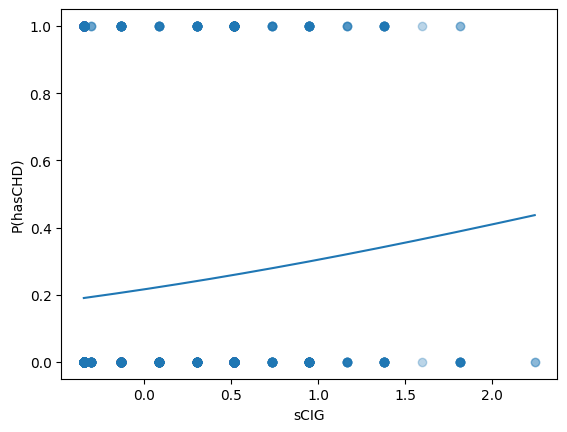

In [74]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
coefs = fit.params[['sCHOL', 'sCIG', 'sFRW']]
best = coefs.abs().idxmax()
x = fram[best]
x_range = np.linspace(x.min(), x.max(), 200)
df_pred = pd.DataFrame({best: x_range})
for var in ['sCHOL', 'sCIG', 'sFRW']:
    if var != best:
        df_pred[var] = 0.0
plt.figure()
plt.scatter(x, fram['hasCHD'], alpha=0.3)
probs = fit.predict(df_pred)
plt.plot(x_range, probs)
plt.xlabel(best)
plt.ylabel('P(hasCHD)')
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Although the model achieves a seemingly high overall accuracy by predicting the majority class (“no CHD”), its improvement over that naïve baseline is minimal. This indicates poor real‐world performance: it would miss too many true CHD cases or flag too many healthy individuals. Therefore, as constructed, the model is not practically useful without additional predictors, better handling of class imbalance, and more appropriate evaluation metrics
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [75]:
# exercise 17
sCHOL_val = (200 - fram['CHOL'].mean()) / (2 * fram['CHOL'].std())
sCIG_val  = (17  - fram['CIG' ].mean()) / (2 * fram['CIG' ].std())
sFRW_val  = (100 - fram['FRW'].mean()) / (2 * fram['FRW'].std())
point = {
    'sCHOL': sCHOL_val,
    'sCIG':  sCIG_val,
    'sFRW':  sFRW_val
}
predicted = fit.predict(pd.DataFrame([point]))[0]
print(f"Normalized inputs: {point}")
print(f"Predicted P(hasCHD) = {predicted:.4f}")

Normalized inputs: {'sCHOL': np.float64(-0.37410417825308084), 'sCIG': np.float64(0.3871927538102119), 'sFRW': np.float64(-0.1511094123560532)}
Predicted P(hasCHD) = 0.2162
